<a href="https://colab.research.google.com/github/park21306/DataProject/blob/main/Automate_API_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from requests import Request , Session
from requests.exceptions import ConnectionError , Timeout , TooManyRedirects
import json
import pandas as pd
import os
from time import time
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

In [3]:
parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
}

headers = {
    'Accepts':'application/json',
    'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url,params=parameters)
  data = json.loads(response.text)

except(ConnectionError,Timeout,TooManyRedirects) as e:
  print(e)

In [4]:
type(data)

dict

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

<ipython-input-5-368209ea68cb>:5: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10478,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.949626e+07,1.949626e+07,False,NaN,1,NaN,NaN,None,2023-09-26T08:42:00.000Z,26267.028636,1.039347e+10,-3.9712,0.041482,0.585728,-2.630129,0.827177,-9.966105,-13.143306,5.121089e+11,48.9011,5.516076e+11,None,2023-09-26T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 08:44:24.483090
1,1027,Ethereum,ETH,ethereum,7438,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202324e+08,1.202324e+08,True,NaN,2,NaN,NaN,None,2023-09-26T08:42:00.000Z,1590.061874,3.690128e+09,-11.0027,0.178997,0.831978,-3.067962,-3.598030,-14.628952,-14.333043,1.911769e+11,18.2554,1.911769e+11,None,2023-09-26T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 08:44:24.483090
2,825,Tether USDt,USDT,tether,62809,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.320788e+10,8.642620e+10,True,NaN,3,NaN,NaN,None,2023-09-26T08:42:00.000Z,0.999790,1.690680e+10,0.6809,0.006785,0.001291,-0.035662,0.024321,0.006514,-0.032996,8.319044e+10,7.9438,8.640808e+10,None,2023-09-26T08:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-26 08:44:24.483090
3,1839,BNB,BNB,bnb,1638,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538472e+08,1.538472e+08,False,NaN,4,NaN,NaN,None,2023-09-26T08:42:00.000Z,213.183649,5.915822e+08,80.5924,0.644744,2.003322,-2.057658,-1.725889,-11.627297,-8.260959,3.279770e+10,3.1318,3.279770e+10,None,2023-09-26T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 08:44:24.483090
4,52,XRP,XRP,xrp,1098,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.324524e+10,9.998841e+10,False,NaN,5,NaN,NaN,None,2023-09-26T08:42:00.000Z,0.500094,7.450887e+08,11.0655,-0.325944,1.138687,-1.167898,-5.330070,-29.427271,5.411540,2.662763e+10,2.5427,5.000941e+10,None,2023-09-26T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 08:44:24.483090
5,3408,USDC,USDC,usd-coin,14230,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.564085e+10,2.564085e+10,False,NaN,6,NaN,NaN,None,2023-09-26T08:42:00.000Z,1.000015,2.637887e+09,9.3870,0.002304,-0.002465,-0.008353,-0.001320,-0.002286,0.011442,2.564123e+10,2.4485,2.564123e+10,None,2023-09-26T08:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-26 08:44:24.483090
6,2010,Cardano,ADA,cardano,939,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.512374e+10,3.619858e+10,False,NaN,7,NaN,NaN,None,2023-09-26T08:42:00.000Z,0.246113,1.156041e+08,24.3636,0.144735,0.564404,-2.968169,-6.581087,-20.568471,-10.417414,8.644393e+09,0.8254,1.107506e+10,None,2023-09-26T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 08:44:24.483090
7,74,Dogecoin,DOGE,dogecoin,800,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.411627e+11,1.411627e+11,True,NaN,8,NaN,NaN,None,2023-09-26T08:42:00.000Z,0.060876,9.833433e+07,-27.4705,0.059655,0.157039,-2.369246,-3.982584,-20.396424,-5.222779,8.593444e+09,0.8209,8.593444e+09,None,2023-09-26T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 08:44:24.483090
8,5426,Solana,SOL,solana,530,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.1

In [6]:
def api_runner():
  global df
  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
  }

  headers = {
    'Accepts':'application/json',
    'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url,params=parameters)
    data = json.loads(response.text)

  except(ConnectionError,Timeout,TooManyRedirects) as e:
    print(e)

  df2 = pd.json_normalize(data['data'])
  df2['Timestamp'] = pd.to_datetime('now')
  df = df.append(df2)

In [7]:
for i in range(10):
  api_runner()
  print('API Runner completed')
  sleep(60)
exit()

<ipython-input-6-4d3443c9bad2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-6-4d3443c9bad2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


<ipython-input-6-4d3443c9bad2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-6-4d3443c9bad2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


<ipython-input-6-4d3443c9bad2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-6-4d3443c9bad2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


<ipython-input-6-4d3443c9bad2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-6-4d3443c9bad2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


<ipython-input-6-4d3443c9bad2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-6-4d3443c9bad2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


<ipython-input-6-4d3443c9bad2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-6-4d3443c9bad2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


<ipython-input-6-4d3443c9bad2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-6-4d3443c9bad2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


<ipython-input-6-4d3443c9bad2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-6-4d3443c9bad2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


<ipython-input-6-4d3443c9bad2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-6-4d3443c9bad2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


<ipython-input-6-4d3443c9bad2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-6-4d3443c9bad2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10478,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.949626e+07,1.949626e+07,False,NaN,1,NaN,NaN,None,2023-09-26T08:42:00.000Z,26267.028636,1.039347e+10,-3.9712,0.041482,0.585728,-2.630129,0.827177,-9.966105,-13.143306,5.121089e+11,48.9011,5.516076e+11,None,2023-09-26T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 08:44:24.483090,NaT
1,1027,Ethereum,ETH,ethereum,7438,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202324e+08,1.202324e+08,True,NaN,2,NaN,NaN,None,2023-09-26T08:42:00.000Z,1590.061874,3.690128e+09,-11.0027,0.178997,0.831978,-3.067962,-3.598030,-14.628952,-14.333043,1.911769e+11,18.2554,1.911769e+11,None,2023-09-26T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 08:44:24.483090,NaT
2,825,Tether USDt,USDT,tether,62809,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.320788e+10,8.642620e+10,True,NaN,3,NaN,NaN,None,2023-09-26T08:42:00.000Z,0.999790,1.690680e+10,0.6809,0.006785,0.001291,-0.035662,0.024321,0.006514,-0.032996,8.319044e+10,7.9438,8.640808e+10,None,2023-09-26T08:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-26 08:44:24.483090,NaT
3,1839,BNB,BNB,bnb,1638,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538472e+08,1.538472e+08,False,NaN,4,NaN,NaN,None,2023-09-26T08:42:00.000Z,213.183649,5.915822e+08,80.5924,0.644744,2.003322,-2.057658,-1.725889,-11.627297,-8.260959,3.279770e+10,3.1318,3.279770e+10,None,2023-09-26T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 08:44:24.483090,NaT
4,52,XRP,XRP,xrp,1098,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.324524e+10,9.998841e+10,False,NaN,5,NaN,NaN,None,2023-09-26T08:42:00.000Z,0.500094,7.450887e+08,11.0655,-0.325944,1.138687,-1.167898,-5.330070,-29.427271,5.411540,2.662763e+10,2.5427,5.000941e+10,None,2023-09-26T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 08:44:24.483090,NaT
5,3408,USDC,USDC,usd-coin,14230,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.564085e+10,2.564085e+10,False,NaN,6,NaN,NaN,None,2023-09-26T08:42:00.000Z,1.000015,2.637887e+09,9.3870,0.002304,-0.002465,-0.008353,-0.001320,-0.002286,0.011442,2.564123e+10,2.4485,2.564123e+10,None,2023-09-26T08:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-26 08:44:24.483090,NaT
6,2010,Cardano,ADA,cardano,939,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.512374e+10,3.619858e+10,False,NaN,7,NaN,NaN,None,2023-09-26T08:42:00.000Z,0.246113,1.156041e+08,24.3636,0.144735,0.564404,-2.968169,-6.581087,-20.568471,-10.417414,8.644393e+09,0.8254,1.107506e+10,None,2023-09-26T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 08:44:24.483090,NaT
7,74,Dogecoin,DOGE,dogecoin,800,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.411627e+11,1.411627e+11,True,NaN,8,NaN,NaN,None,2023-09-26T08:42:00.000Z,0.060876,9.833433e+07,-27.4705,0.059655,0.157039,-2.369246,-3.982584,-20.396424,-5.222779,8.593444e+09,0.8209,8.593444e+09,None,2023-09-26T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 08:44:24.483090,NaT
8,5426,Solana,SOL,solana,530,2020-04-10T00:00:00.000Z,"[pos, platform, 

In [9]:
pd.set_option('display.float_format',lambda x:'%.5f' % x)

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10478,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19496262.00000,19496262.00000,False,NaN,1,NaN,NaN,None,2023-09-26T08:42:00.000Z,26267.02864,10393467779.99259,-3.97120,0.04148,0.58573,-2.63013,0.82718,-9.96611,-13.14331,512108872242.35980,48.90110,551607601348.89001,None,2023-09-26T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 08:44:24.483090,NaT
1,1027,Ethereum,ETH,ethereum,7438,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120232366.36038,120232366.36038,True,NaN,2,NaN,NaN,None,2023-09-26T08:42:00.000Z,1590.06187,3690127511.12985,-11.00270,0.17900,0.83198,-3.06796,-3.59803,-14.62895,-14.33304,191176901769.46552,18.25540,191176901769.47000,None,2023-09-26T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 08:44:24.483090,NaT
2,825,Tether USDt,USDT,tether,62809,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83207883380.70059,86426198724.99622,True,NaN,3,NaN,NaN,None,2023-09-26T08:42:00.000Z,0.99979,16906804424.97639,0.68090,0.00678,0.00129,-0.03566,0.02432,0.00651,-0.03300,83190443151.54185,7.94380,86408083942.48000,None,2023-09-26T08:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-26 08:44:24.483090,NaT
3,1839,BNB,BNB,bnb,1638,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153847170.60761,153847170.60761,False,NaN,4,NaN,NaN,None,2023-09-26T08:42:00.000Z,213.18365,591582223.42877,80.59240,0.64474,2.00332,-2.05766,-1.72589,-11.62730,-8.26096,32797701152.94981,3.13180,32797701152.95000,None,2023-09-26T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 08:44:24.483090,NaT
4,52,XRP,XRP,xrp,1098,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53245240268.00000,99988414766.00000,False,NaN,5,NaN,NaN,None,2023-09-26T08:42:00.000Z,0.50009,745088671.06445,11.06550,-0.32594,1.13869,-1.16790,-5.33007,-29.42727,5.41154,26627633153.48007,2.54270,50009414962.64000,None,2023-09-26T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 08:44:24.483090,NaT
5,3408,USDC,USDC,usd-coin,14230,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25640854891.84089,25640854891.84089,False,NaN,6,NaN,NaN,None,2023-09-26T08:42:00.000Z,1.00001,2637886711.90030,9.38700,0.00230,-0.00246,-0.00835,-0.00132,-0.00229,0.01144,25641227565.90043,2.44850,25641227565.90000,None,2023-09-26T08:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-26 08:44:24.483090,NaT
6,2010,Cardano,ADA,cardano,939,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35123739191.64600,36198584811.42400,False,NaN,7,NaN,NaN,None,2023-09-26T08:42:00.000Z,0.24611,115604064.90955,24.36360,0.14473,0.56440,-2.96817,-6.58109,-20.56847,-10.41741,8644392642.70995,0.82540,11075064269.20000,None,2023-09-26T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 08:44:24.483090,NaT
7,74,Dogecoin,DOGE,dogecoin,800,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,141162676383.70523,141162676383.70523,True,NaN,8,NaN,NaN,None,2023-09-26T08:42:00.000Z,0.06088,98334334.29863,-27.47050,0.05965,0.15704,-2.36925,-3.98258,-20.39642,-5.22278,8593443585.08195,0.82090,8593443585

In [11]:
df3 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h',
                                     'quote.USD.percent_change_24h',
                                     'quote.USD.percent_change_7d',
                                     'quote.USD.percent_change_30d',
                                     'quote.USD.percent_change_60d',
                                     'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.06942,0.61330,-2.59350,0.86268,-9.92022,-13.12074
Ethereum,0.16436,0.86879,-2.99718,-3.55678,-14.58623,-14.28956
Tether USDt,0.00343,0.00068,-0.03867,0.02078,0.00716,-0.04400
BNB,0.61109,1.98863,-2.14626,-1.76787,-11.64921,-8.21531
XRP,-0.38806,1.13302,-1.21864,-5.36503,-29.48325,5.38482
USDC,0.00879,0.00711,-0.00330,0.00329,0.01106,0.00154
Cardano,0.09641,0.57183,-3.00545,-6.55155,-20.64627,-10.36661
Dogecoin,0.03437,0.15531,-2.38353,-4.02148,-20.35559,-5.23805
Solana,0.10030,-0.43313,-3.11558,-5.59873,-21.66643,20.41499


In [12]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.06942
             quote.USD.percent_change_24h     0.61330
             quote.USD.percent_change_7d     -2.59350
             quote.USD.percent_change_30d     0.86268
             quote.USD.percent_change_60d    -9.92022
             quote.USD.percent_change_90d   -13.12074
Ethereum     quote.USD.percent_change_1h      0.16436
             quote.USD.percent_change_24h     0.86879
             quote.USD.percent_change_7d     -2.99718
             quote.USD.percent_change_30d    -3.55678
             quote.USD.percent_change_60d   -14.58623
             quote.USD.percent_change_90d   -14.28956
Tether USDt  quote.USD.percent_change_1h      0.00343
             quote.USD.percent_change_24h     0.00068
             quote.USD.percent_change_7d     -0.03867
             quote.USD.percent_change_30d     0.02078
             quote.USD.percent_change_60d     0.00716
             quote.USD.percent_change_90

In [13]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.06942
            quote.USD.percent_change_24h   0.61330
            quote.USD.percent_change_7d   -2.59350
            quote.USD.percent_change_30d   0.86268
            quote.USD.percent_change_60d  -9.92022
            quote.USD.percent_change_90d -13.12074
Ethereum    quote.USD.percent_change_1h    0.16436
            quote.USD.percent_change_24h   0.86879
            quote.USD.percent_change_7d   -2.99718
            quote.USD.percent_change_30d  -3.55678
            quote.USD.percent_change_60d -14.58623
            quote.USD.percent_change_90d -14.28956
Tether USDt quote.USD.percent_change_1h    0.00343
            quote.USD.percent_change_24h   0.00068
            quote.USD.percent_change_7d   -0.03867
            quote.USD.percent_change_30d   0.02078
            quote.USD.percent_change_60d   0.00716
            quote.USD.percent_change_90d  -0.04400
BNB         quote.USD.percent_change_1h    0.61109
            quote.USD.percent_change_24h   1.98863
            quote.USD.percent_change_7d   -2.14626
            quote.USD.percent_change_30d  -1.76787
            quote.USD.percent_change_60d -11.64921
            quote.USD.percent_change_90d  -8.21531
XRP         quote.USD.percent_change_1h   -0.38806
            quote.USD.percent_change_24h   1.13302
            quote.USD.percent_change_7d   -1.21864
            quote.USD.percent_change_30d  -5.36503
            quote.USD.percent_change_60d -29.48325
            quote.USD.percent_change_90d   5.38482
USDC        quote.USD.percent_change_1h    0.00879
            quote.USD.percent_change_24h   0.00711
            quote.USD.percent_change_7d   -0.00330
            quote.USD.percent_change_30d   0.00329
            quote.USD.percent_change_60d   0.01106
            quote.USD.percent_change_90d   0.00154
Cardano     quote.USD.percent_change_1h    0.09641
            quote.USD.percent_change_24h   0.57183
            quote.USD.percent_change_7d   -3.00545
            quote.USD.percent_change_30d  -6.55155
            quote.USD.percent_change_60d -20.64627
            quote.USD.percent_change_90d -10.36661
Dogecoin    quote.USD.percent_change_1h    0.03437
            quote.USD.percent_change_24h   0.15531
            quote.USD.percent_change_7d   -2.38353
            quote.USD.percent_change_30d  -4.02148
            quote.USD.percent_change_60d -20.35559
            quote.USD.percent_change_90d  -5.23805
Solana      quote.USD.percent_change_1h    0.10030
            quote.USD.percent_change_24h  -0.43313
            quote.USD.percent_change_7d   -3.11558
            quote.USD.percent_change_30d  -5.59873
            quote.USD.percent_change_60d -21.66643
            quote.USD.percent_change_90d  20.41499
TRON        quote.USD.percent_change_1h    0.06961
            quote.USD.percent_change_24h   0.62723
            quote.USD.percent_change_7d    0.49513
            quote.USD.percent_change_30d   9.46678
            quote.USD.percent_change_60d   1.45613
            quote.USD.percent_change_90d  14.29044
Toncoin     quote.USD.percent_change_1h    0.49555
            quote.USD.percent_change_24h  -2.02361
            quote.USD.percent_change_7d  -11.28640
            quote.USD.percent_change_30d  46.58656
            quote.USD.percent_change_60d  61.53509
            quote.USD.percent_change_90d  56.21325
Dai         quote.USD.percent_change_1h    0.03321
            quote.USD.percent_change_24h   0.03047
            quote.USD.percent_change_7d   -0.02703
            quote.USD.percent_change_30d   0.01708
            quote.USD.percent_change_60d   0.04756
            quote.USD.percent_change_90d   0.06678
Polkadot    quote.USD.percent_change_1h    0.28321
            quote.USD.percent_change_24h   0.31495
            quote.USD.percent_change_7d   -1.38781
            quote.USD.percent_change_30d -10.45338
            quote.USD.percent_change_60d -21.94745
            quo

In [14]:
df5.count()

values    90
dtype: int64

In [15]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.06942
1,Bitcoin,quote.USD.percent_change_24h,0.61330
2,Bitcoin,quote.USD.percent_change_7d,-2.59350
3,Bitcoin,quote.USD.percent_change_30d,0.86268
4,Bitcoin,quote.USD.percent_change_60d,-9.92022
5,Bitcoin,quote.USD.percent_change_90d,-13.12074
6,Ethereum,quote.USD.percent_change_1h,0.16436
7,Ethereum,quote.USD.percent_change_24h,0.86879
8,Ethereum,quote.USD.percent_change_7d,-2.99718
9,Ethereum,quote.USD.percent_change_30d,-3.55678


In [16]:
df7 = df6.rename(columns = {'level_1' : 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.06942
1,Bitcoin,quote.USD.percent_change_24h,0.61330
2,Bitcoin,quote.USD.percent_change_7d,-2.59350
3,Bitcoin,quote.USD.percent_change_30d,0.86268
4,Bitcoin,quote.USD.percent_change_60d,-9.92022
5,Bitcoin,quote.USD.percent_change_90d,-13.12074
6,Ethereum,quote.USD.percent_change_1h,0.16436
7,Ethereum,quote.USD.percent_change_24h,0.86879
8,Ethereum,quote.USD.percent_change_7d,-2.99718
9,Ethereum,quote.USD.percent_change_30d,-3.55678


In [17]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h',
                                                       'quote.USD.percent_change_7d',
                                                       'quote.USD.percent_change_30d',
                                                       'quote.USD.percent_change_60d',
                                                       'quote.USD.percent_change_90d'],
                                                        ['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.06942
1,Bitcoin,24h,0.61330
2,Bitcoin,7d,-2.59350
3,Bitcoin,30d,0.86268
4,Bitcoin,60d,-9.92022
5,Bitcoin,90d,-13.12074
6,Ethereum,quote.USD.percent_change_1h,0.16436
7,Ethereum,24h,0.86879
8,Ethereum,7d,-2.99718
9,Ethereum,30d,-3.55678


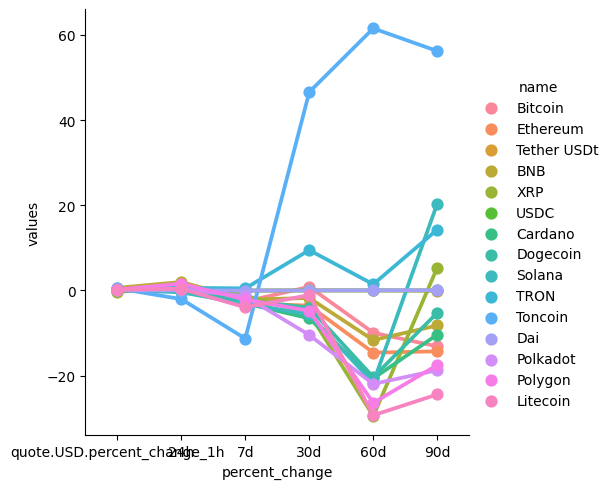

In [18]:
sns.catplot(x='percent_change',y='values',hue='name',data=df7,kind='point')

In [19]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,26267.02864,2023-09-26 08:44:24.483090
0,Bitcoin,26267.02864,NaT
0,Bitcoin,26267.41582,NaT
0,Bitcoin,26268.09882,NaT
0,Bitcoin,26271.83245,NaT
0,Bitcoin,26271.83245,NaT
0,Bitcoin,26276.62238,NaT
0,Bitcoin,26274.52518,NaT
0,Bitcoin,26274.52518,NaT
0,Bitcoin,26274.45405,NaT


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

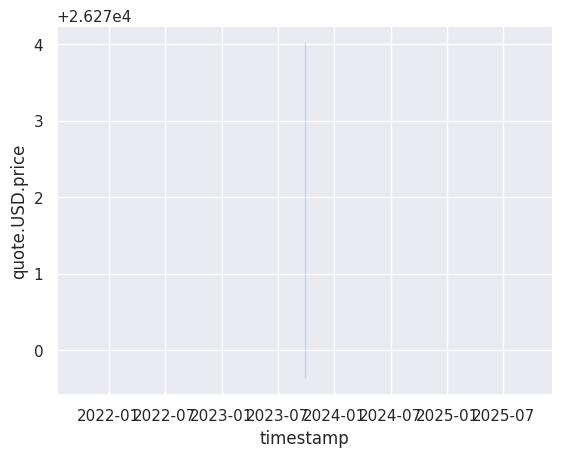

In [20]:
sns.set_theme(style = "darkgrid")
sns.lineplot(x = 'timestamp',y='quote.USD.price',data = df10)